In [1]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor, AllChem
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from IPython.display import SVG
import pandas as pd

%matplotlib inline

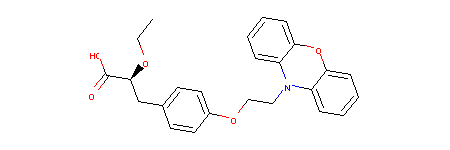

In [2]:
mol_smiles = 'CCO[C@@H](Cc1ccc(OCCN2c3ccccc3Oc4ccccc24)cc1)C(=O)O'
mol = Chem.MolFromSmiles(mol_smiles)
rdDepictor.Compute2DCoords(mol)
mol

c1ccc(OCCN2c3ccccc3Oc3ccccc32)cc1


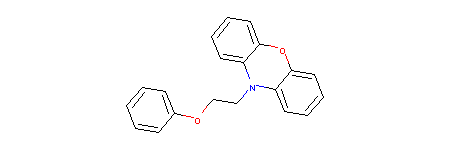

In [3]:
scaf = MurckoScaffold.GetScaffoldForMol(mol)
print(Chem.MolToSmiles(scaf))
scaf

Are substructucre's SMILES strings substrings of their structures' SMILES strings? There's no reason it would necessarily bbe this way.

In [4]:
Chem.MolToSmiles(scaf) in mol_smiles

False

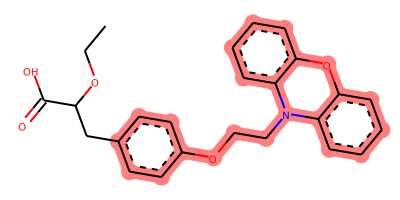

In [5]:
drawer = rdMolDraw2D.MolDraw2DSVG(400, 200)
drawer.DrawMolecule(mol, highlightAtoms=mol.GetSubstructMatch(scaf))
drawer.FinishDrawing()
svg = drawer.GetDrawingText().replace('svg:', '')
SVG(svg)

# Day 2

In [6]:
from rdkit.Chem.rdmolfiles import SDWriter
import os
base = os.path.expanduser('~/GoogleDrive/Bonn/MMDDLabCourse/')

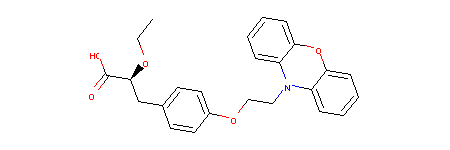

In [7]:
m = Chem.MolFromSmiles(mol_smiles)
m

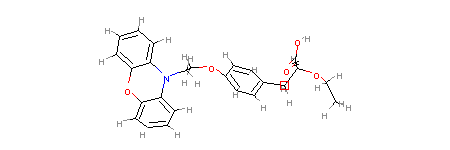

In [8]:
m = Chem.AddHs(m)
AllChem.EmbedMolecule(m)
m

In [9]:
mmff_props = AllChem.MMFFGetMoleculeProperties(m)
ff = AllChem.MMFFGetMoleculeForceField(m, mmff_props)
start_energy = ff.CalcEnergy()
start_energy

261.6807625643878

Optimize exit code: 0
155.6612620718


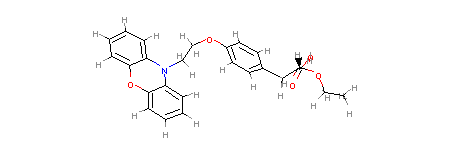

In [10]:
optimize_exit_code = AllChem.MMFFOptimizeMolecule(m, maxIters=1000)
print('Optimize exit code: {}'.format(optimize_exit_code))
end_energy = ff.CalcEnergy()
print(end_energy)
m

In [11]:
with open(os.path.join(base, 'example.sdf'), 'w') as f:
    writer = SDWriter(f)
    writer.write(m)
    writer.close()

Create molecules for each, optimize, and show energies under MMFF force field before and after

In [12]:
from rdkit.Chem import PandasTools

In [ ]:
res = []

with open(os.path.join(base, 'molecules.tsv')) as f:
    for line in f:
        name, smiles = line.strip().split('\t')
        m = Chem.MolFromSmiles(smiles)
        murcko = MurckoScaffold.GetScaffoldForMol(m)
        
        m = Chem.AddHs(m)
        AllChem.EmbedMolecule(m)
        
        with open(os.path.join(base, 'exercise1', '{}_init.sdf'.format(name)), 'w') as f:
            writer = SDWriter(f)
            writer.write(m)
            writer.close()
            
        mmff_props = AllChem.MMFFGetMoleculeProperties(m)
        ff = AllChem.MMFFGetMoleculeForceField(m, mmff_props)
        start_energy = ff.CalcEnergy()
        
        optimize_exit_code = AllChem.MMFFOptimizeMolecule(m, maxIters=1000)
        end_energy = ff.CalcEnergy()
        
        with open(os.path.join(base, 'exercise1', '{}_opt.sdf'.format(name)), 'w') as f:
            writer = SDWriter(f)
            writer.write(m)
            writer.close()
            
        res.append((name, m, murcko, start_energy, end_energy, optimize_exit_code))

cols = 'name', 'smiles', 'murko', 'start energy', 'final energy', 'exit code'

In [14]:
from IPython.display import Image, HTML

RDKit WARNING: [16:54:03] WARNING: bond found with stereo spec but no stereo atoms


,name,smiles,murko,start energy,final energy,exit code
0,atropine,,,250.062669,216.776616,0
1,berberine,,,201.021157,105.813492,0
2,bis-phenylamidine,,,159.051709,-8.752961,0
3,estradiol,,,110.395442,84.678068,0
4,fumagillin,,,246.417723,125.241589,0
5,lisinopril,,,255.508759,146.035608,0
6,lovastatin,,,148.056170,97.655000,0
7,methotrexate,,,172.449895,34.330245,0
8,morphine,,,167.484776,127.901343,0
9,penacillin g,,,253.797264,141.786167,0

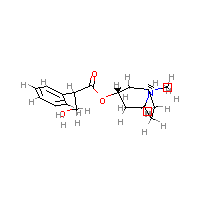
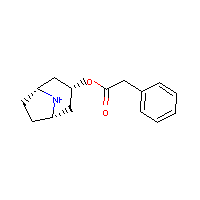
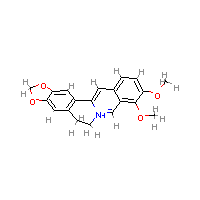
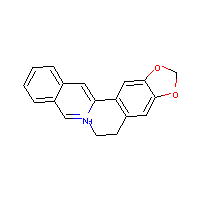
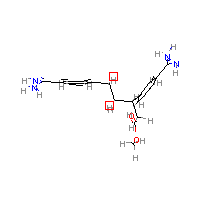
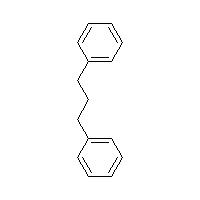
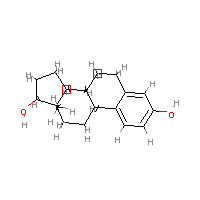
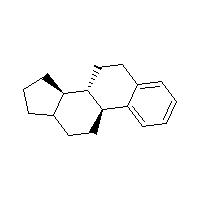
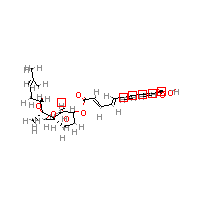
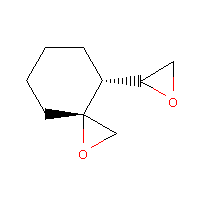
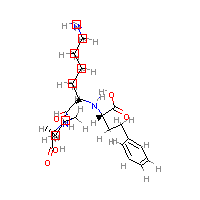
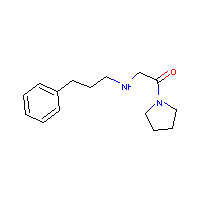
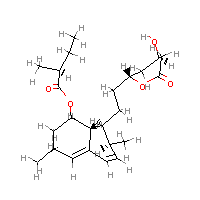
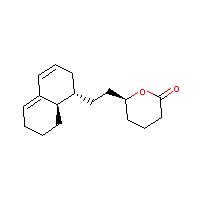
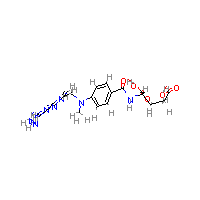
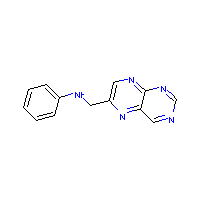
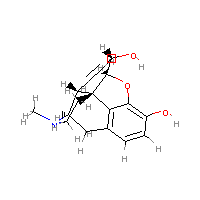
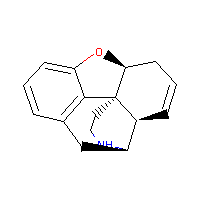
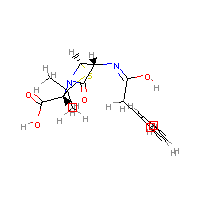
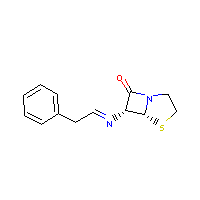
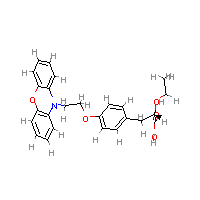
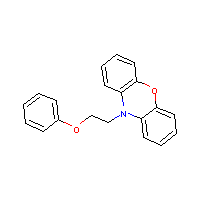
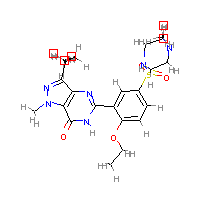
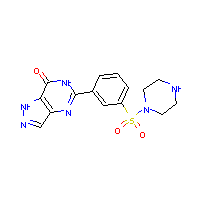
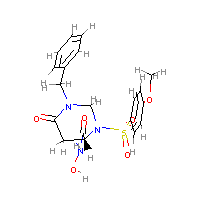
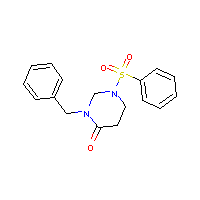
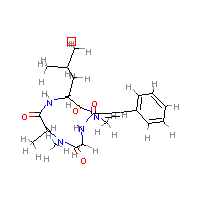
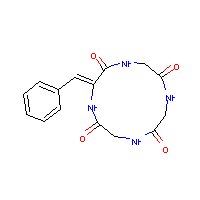
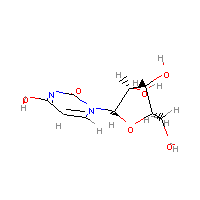
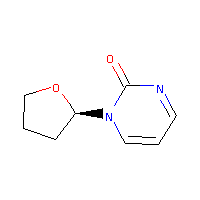

In [17]:
df = pd.DataFrame(res, columns=cols)
HTML(df.to_html(escape=False))